# GETTING STARTED
This is interactive code, which runs sequentially in cells. 
You can run each cell independently or run everything all at once.

You cannot run a cell without running the cells above it or it will have errors.

To run everything at once:
- Go to the 'Run' menu at the top. Sometimes this menu is called 'Cells'
- Tap 'Run All Cells'/'Run All'.
- Click the links below to see the fancy plots. They are interactive.


### Links

*These links will not work until you 'Run All Cells' as instructed above*

- [Plot Confirmed Cases by Province/State](#plot_confirmed)
- [Plot Growth by Province/State](#plot_growth)
- [Plot Acceleration by Province/State](#plot_acceleration)

## Set target country

In [1]:
# MODIFY THIS TO GET YOUR TARGET COUNTRY

# COUNTRIES INCLUDE

# ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Antigua and Barbuda'
#  'Argentina' 'Armenia' 'Aruba' 'Australia' 'Austria' 'Azerbaijan'
#  'Bahrain' 'Bangladesh' 'Barbados' 'Belarus' 'Belgium' 'Benin' 'Bhutan'
#  'Bolivia' 'Bosnia and Herzegovina' 'Brazil' 'Brunei' 'Bulgaria'
#  'Burkina Faso' 'Cambodia' 'Cameroon' 'Canada' 'Central African Republic'
#  'Chile' 'China' 'Colombia' 'Congo (Brazzaville)' 'Congo (Kinshasa)'
#  'Costa Rica' "Cote d'Ivoire" 'Croatia' 'Cruise Ship' 'Cuba' 'Cyprus'
#  'Czechia' 'Denmark' 'Dominican Republic' 'Ecuador' 'Egypt'
#  'Equatorial Guinea' 'Estonia' 'Eswatini' 'Ethiopia' 'Finland' 'France'
#  'Gabon' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Guatemala'
#  'Guernsey' 'Guinea' 'Guyana' 'Holy See' 'Honduras' 'Hungary' 'Iceland'
#  'India' 'Indonesia' 'Iran' 'Iraq' 'Ireland' 'Israel' 'Italy' 'Jamaica'
#  'Japan' 'Jersey' 'Jordan' 'Kazakhstan' 'Kenya' 'Korea, South' 'Kosovo'
#  'Kuwait' 'Latvia' 'Lebanon' 'Liberia' 'Liechtenstein' 'Lithuania'
#  'Luxembourg' 'Malaysia' 'Maldives' 'Malta' 'Martinique' 'Mauritania'
#  'Mexico' 'Moldova' 'Monaco' 'Mongolia' 'Montenegro' 'Morocco' 'Namibia'
#  'Nepal' 'Netherlands' 'New Zealand' 'Nigeria' 'North Macedonia' 'Norway'
#  'Oman' 'Pakistan' 'Panama' 'Paraguay' 'Peru' 'Philippines' 'Poland'
#  'Portugal' 'Qatar' 'Republic of the Congo' 'Romania' 'Russia' 'Rwanda'
#  'Saint Lucia' 'Saint Vincent and the Grenadines' 'San Marino'
#  'Saudi Arabia' 'Senegal' 'Serbia' 'Seychelles' 'Singapore' 'Slovakia'
#  'Slovenia' 'Somalia' 'South Africa' 'Spain' 'Sri Lanka' 'Sudan'
#  'Suriname' 'Sweden' 'Switzerland' 'Taiwan*' 'Tanzania' 'Thailand'
#  'The Bahamas' 'The Gambia' 'Togo' 'Trinidad and Tobago' 'Tunisia'
#  'Turkey' 'US' 'Ukraine' 'United Arab Emirates' 'United Kingdom' 'Uruguay'
#  'Uzbekistan' 'Venezuela' 'Vietnam']

TARGET_COUNTRY = "Japan"

## Download dataset 

Dataset is at https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/

In [2]:
import pandas as pd
import requests
import io

confirmedUrl = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv'
deathsUrl = 'https://github.com/CSSEGISandData/COVID-19/raw/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Deaths.csv'

r = requests.post(confirmedUrl)
if r.ok:
    data = r.content.decode('utf8')
    df = pd.read_csv(io.StringIO(data))
    
# Rename Province/State and Country/Region
df = df.rename(columns={'Province/State': 'provincestate', 'Country/Region': 'countryregion'})

# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

df.head()

provincestate countryregion      Lat      Long  1/22/20  1/23/20  1/24/20  \
0           NaN      Thailand  15.0000  101.0000        2        3        5   
1           NaN         Japan  36.0000  138.0000        2        1        2   
2           NaN     Singapore   1.2833  103.8333        0        1        3   
3           NaN         Nepal  28.1667   84.2500        0        0        0   
4           NaN      Malaysia   2.5000  112.5000        0        0        0   

   1/25/20  1/26/20  1/27/20  ...  3/8/20  3/9/20  3/10/20  3/11/20  3/12/20  \
0        7        8        8  ...      50      50       53       59       70   
1        2        4        4  ...     502     511      581      639      639   
2        3        4        5  ...     150     150      160      178      178   
3        1        1        1  ...       1       1        1        1        1   
4        3        4        4  ...      99     117      129      149      149   

   3/13/20  3/14/20  3/15/20  3/16/20  3/17/20  
0       75       82      114      147      177  
1      701      773      839      825      878  
2      200      212      226      243      266  
3        1        1        1        1        1  
4      197      238      428      566      673  

[5 rows x 60 columns]

In [3]:
# Remove unneeded columns
# df = df.drop(['Lat', 'Long', 'provincestate'], axis=1)

# Reshape 
df_confirmed = df.melt(var_name='date', value_name='confirmed', id_vars=['countryregion', 'provincestate', 'Lat', 'Long'])

df_confirmed.head()

# countries = df_confirmed['countryregion'].unique()
# countries.sort(axis=0)
# print(countries)

countryregion provincestate      Lat      Long     date  confirmed
0      Thailand           NaN  15.0000  101.0000  1/22/20          2
1         Japan           NaN  36.0000  138.0000  1/22/20          2
2     Singapore           NaN   1.2833  103.8333  1/22/20          0
3         Nepal           NaN  28.1667   84.2500  1/22/20          0
4      Malaysia           NaN   2.5000  112.5000  1/22/20          0

In [10]:
# Restrict to target country
df_confirmed_grouped = df_confirmed.query('countryregion == "{}"'.format(TARGET_COUNTRY)).copy()
df_confirmed_grouped['provincestate'] = df_confirmed_grouped['provincestate'].fillna('Unknown')

df_confirmed_grouped.head(20)

countryregion provincestate   Lat   Long     date  confirmed
1            Japan       Unknown  36.0  138.0  1/22/20          2
461          Japan       Unknown  36.0  138.0  1/23/20          1
921          Japan       Unknown  36.0  138.0  1/24/20          2
1381         Japan       Unknown  36.0  138.0  1/25/20          2
1841         Japan       Unknown  36.0  138.0  1/26/20          4
2301         Japan       Unknown  36.0  138.0  1/27/20          4
2761         Japan       Unknown  36.0  138.0  1/28/20          7
3221         Japan       Unknown  36.0  138.0  1/29/20          7
3681         Japan       Unknown  36.0  138.0  1/30/20         11
4141         Japan       Unknown  36.0  138.0  1/31/20         15
4601         Japan       Unknown  36.0  138.0   2/1/20         20
5061         Japan       Unknown  36.0  138.0   2/2/20         20
5521         Japan       Unknown  36.0  138.0   2/3/20         20
5981         Japan       Unknown  36.0  138.0   2/4/20         22
6441         Japan       Unknown  36.0  138.0   2/5/20         22
6901         Japan       Unknown  36.0  138.0   2/6/20         45
7361         Japan       Unknown  36.0  138.0   2/7/20         25
7821         Japan       Unknown  36.0  138.0   2/8/20         25
8281         Japan       Unknown  36.0  138.0   2/9/20         26
8741         Japan       Unknown  36.0  138.0  2/10/20         26

## Calculate metrics

In [11]:
# Calculate change
window = 5
growthCalculation = lambda x: (x.max())

from sklearn.linear_model import LinearRegression
linear_regressor = LinearRegression()

x = pd.Series(range(0,window)).values.reshape(-1,1)
linearCoefficient = lambda values: (linear_regressor.fit(x, values.values.reshape(-1,1)).coef_)

df_confirmed_grouped['growth_rate'] = df_confirmed_grouped.groupby(['provincestate'])['confirmed'].rolling(window).apply(linearCoefficient).fillna(0).reset_index(level=0, drop=True)
df_confirmed_grouped['acceleration_rate'] = df_confirmed_grouped['growth_rate'].rolling(window).apply(linearCoefficient).fillna(0)

df_confirmed_grouped.head(10)

countryregion provincestate   Lat   Long     date  confirmed  \
1            Japan       Unknown  36.0  138.0  1/22/20          2   
461          Japan       Unknown  36.0  138.0  1/23/20          1   
921          Japan       Unknown  36.0  138.0  1/24/20          2   
1381         Japan       Unknown  36.0  138.0  1/25/20          2   
1841         Japan       Unknown  36.0  138.0  1/26/20          4   
2301         Japan       Unknown  36.0  138.0  1/27/20          4   
2761         Japan       Unknown  36.0  138.0  1/28/20          7   
3221         Japan       Unknown  36.0  138.0  1/29/20          7   
3681         Japan       Unknown  36.0  138.0  1/30/20         11   
4141         Japan       Unknown  36.0  138.0  1/31/20         15   

      growth_rate  acceleration_rate  
1             0.0               0.00  
461           0.0               0.00  
921           0.0               0.00  
1381          0.0               0.00  
1841          0.5               0.10  
2301          0.8               0.21  
2761          1.2               0.32  
3221          1.3               0.33  
3681          1.7               0.29  
4141          2.6               0.41

## Plot
### Prepare chart

In [12]:
# Show fig
import plotly.express as px
import plotly.graph_objects as go

colorSequence = ["red", "royalblue"]

layout = go.Layout(title="COVID-19 confirmed cases by province/state", margin={"l": 100, "r": 100},
                   colorway=["#287D95", "#EF533B"], legend={"x": 0.7, "y": 1, 'orientation': "h"},
                   yaxis={'title': 'Confirmed cases'},                   
                   xaxis={"title": "Date",
                         'domain': [0, 0.92]},
                   height=1000)

chinaColor = colorSequence[0]

# Only plot 'confirmed', since we can't control the dashed lines and second-axes using Plotly Express
trace_confirmed = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='confirmed', 
                           color='provincestate',).data

# Add growth rate
trace_growth = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='growth_rate', 
                           color='provincestate',).data

# Add acceleration rate
trace_accel = px.line(df_confirmed_grouped, 
                           x='date', 
                           y='acceleration_rate', 
                           color='provincestate',).data

<a id='plot_confirmed'></a>
### Plot Confirmed Cases by Province/State

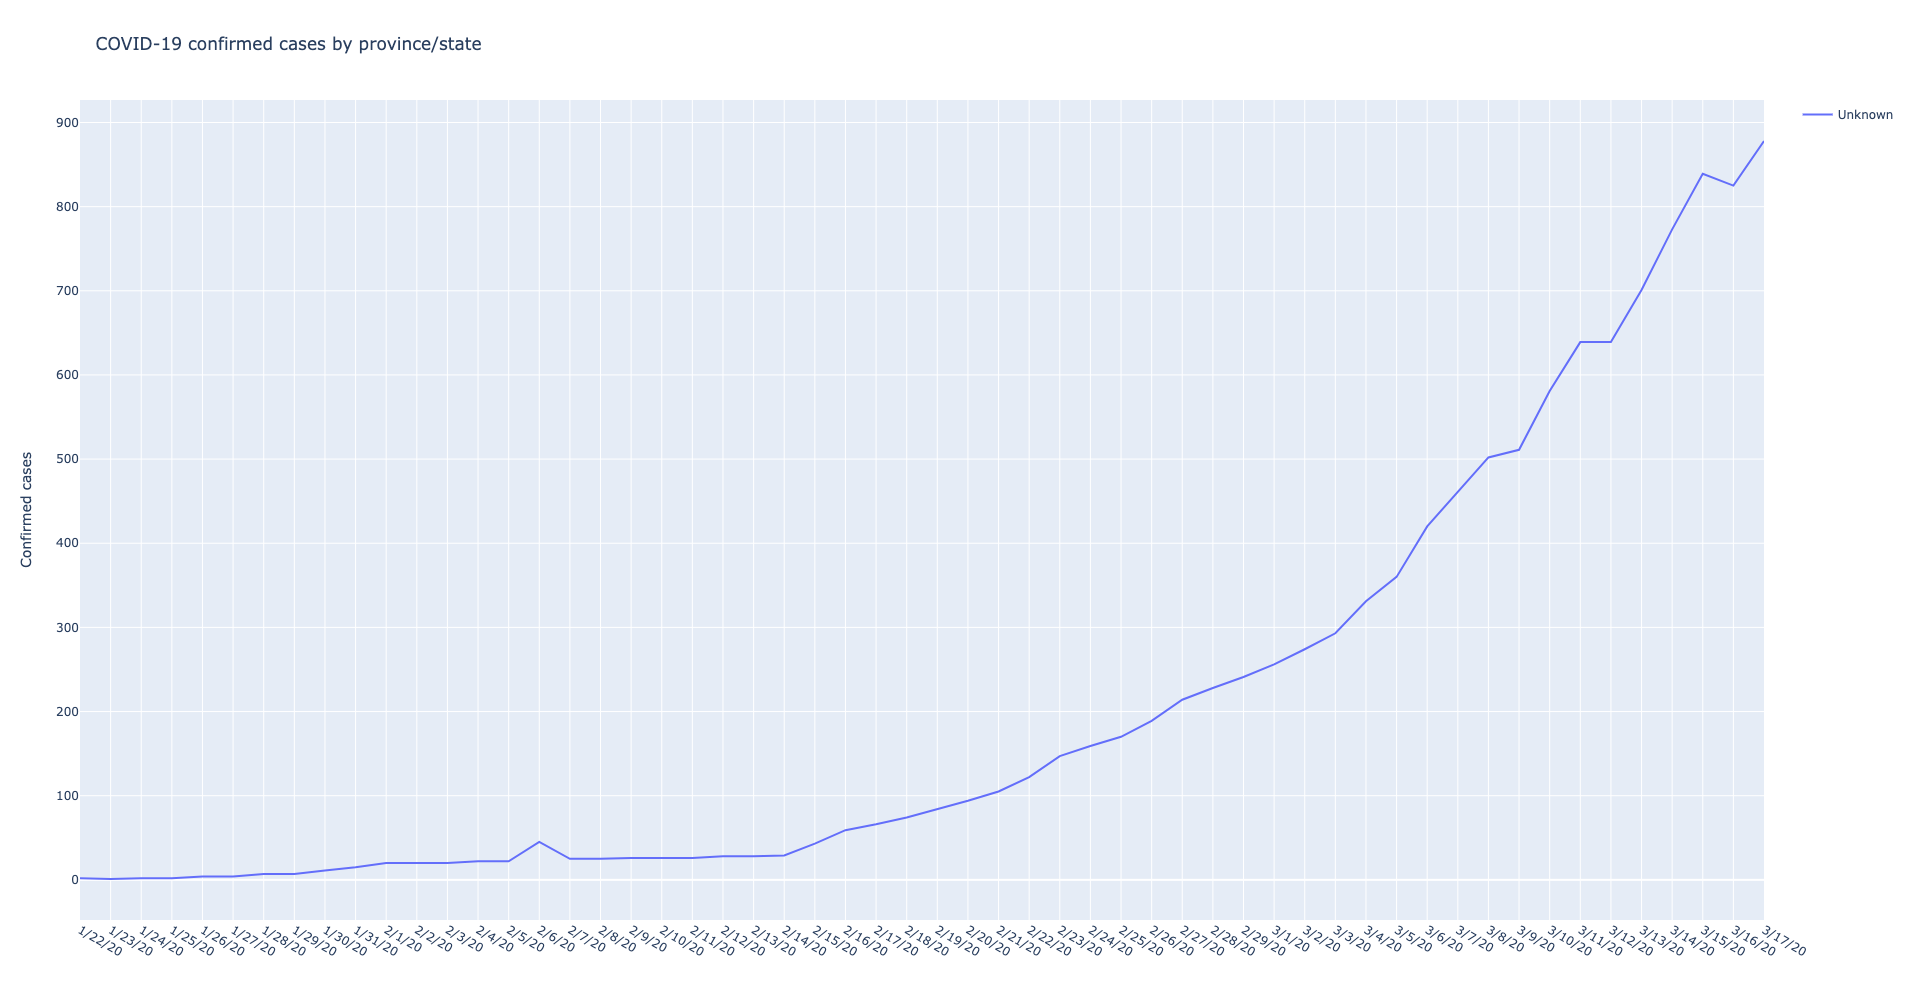

In [13]:
layout = go.Layout(title="COVID-19 confirmed cases by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_growth'></a>
### Plot Growth Rate by Province/State

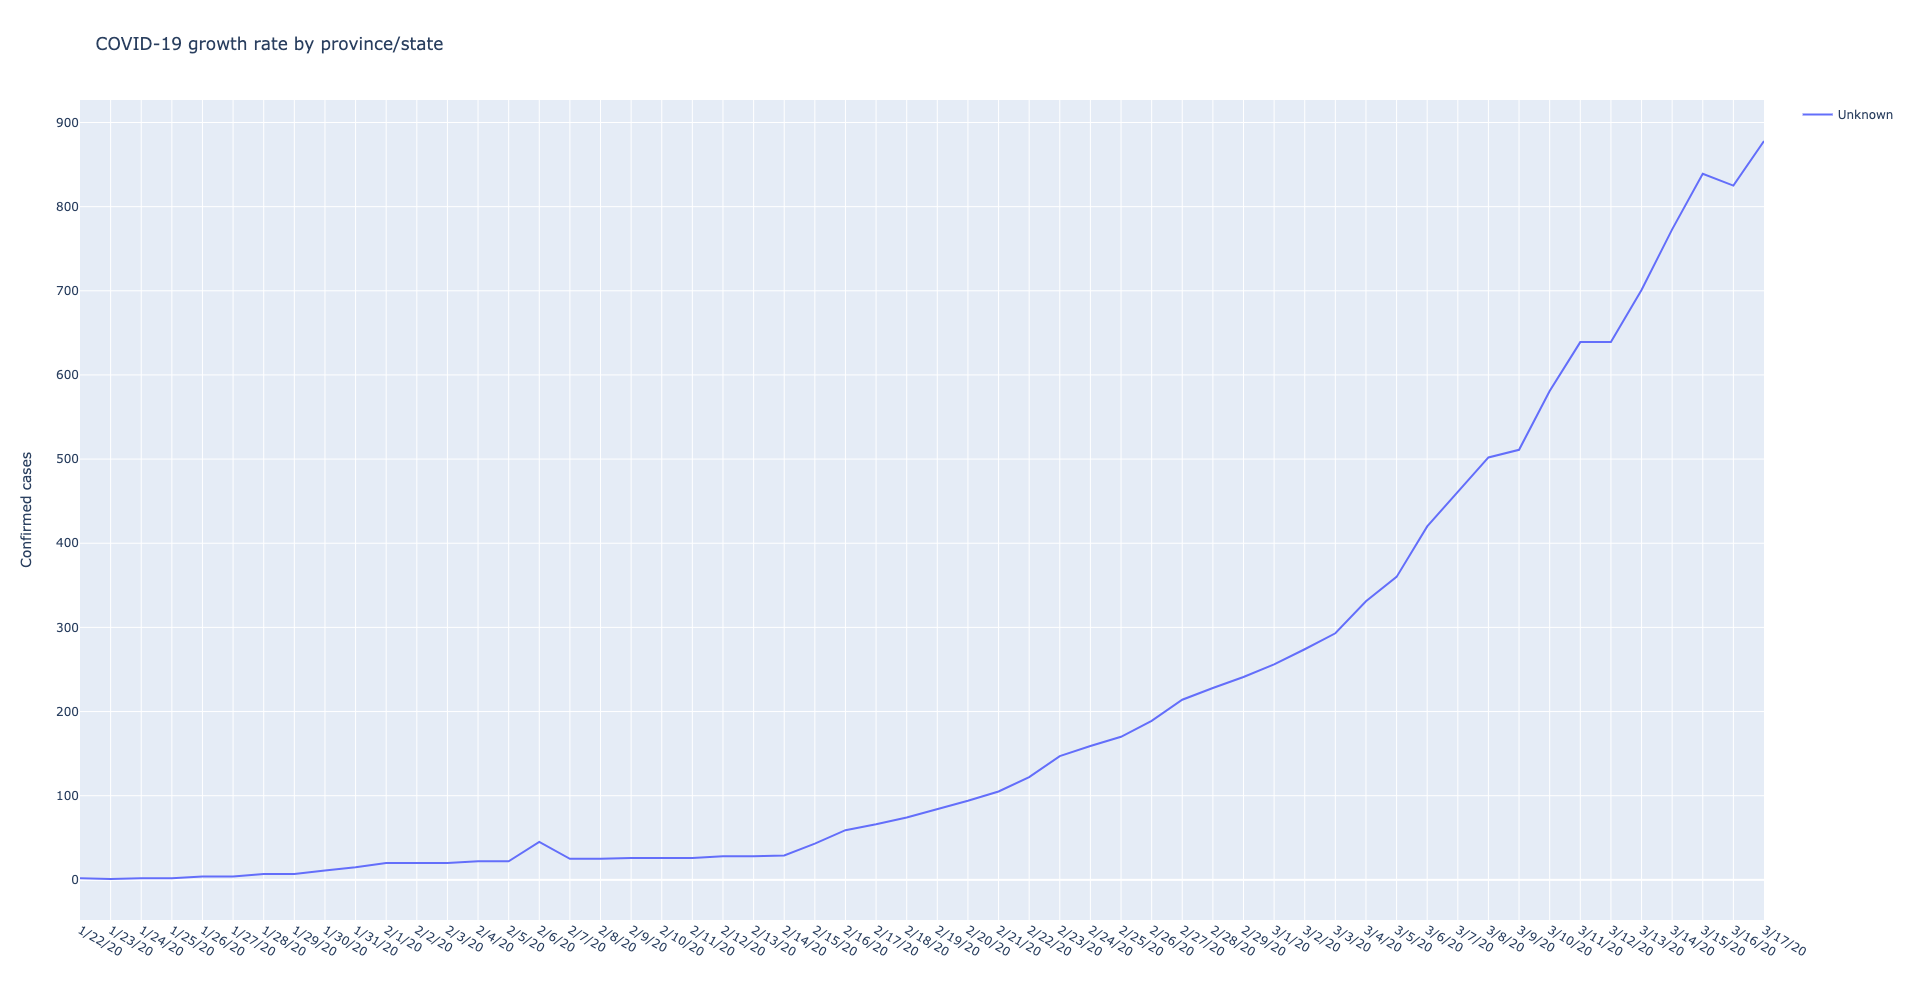

In [14]:
layout = go.Layout(title="COVID-19 growth rate by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_confirmed, layout=layout)
fig.show()

<a id='plot_acceleration'></a>
### Plot Acceleration Rate by Province/State

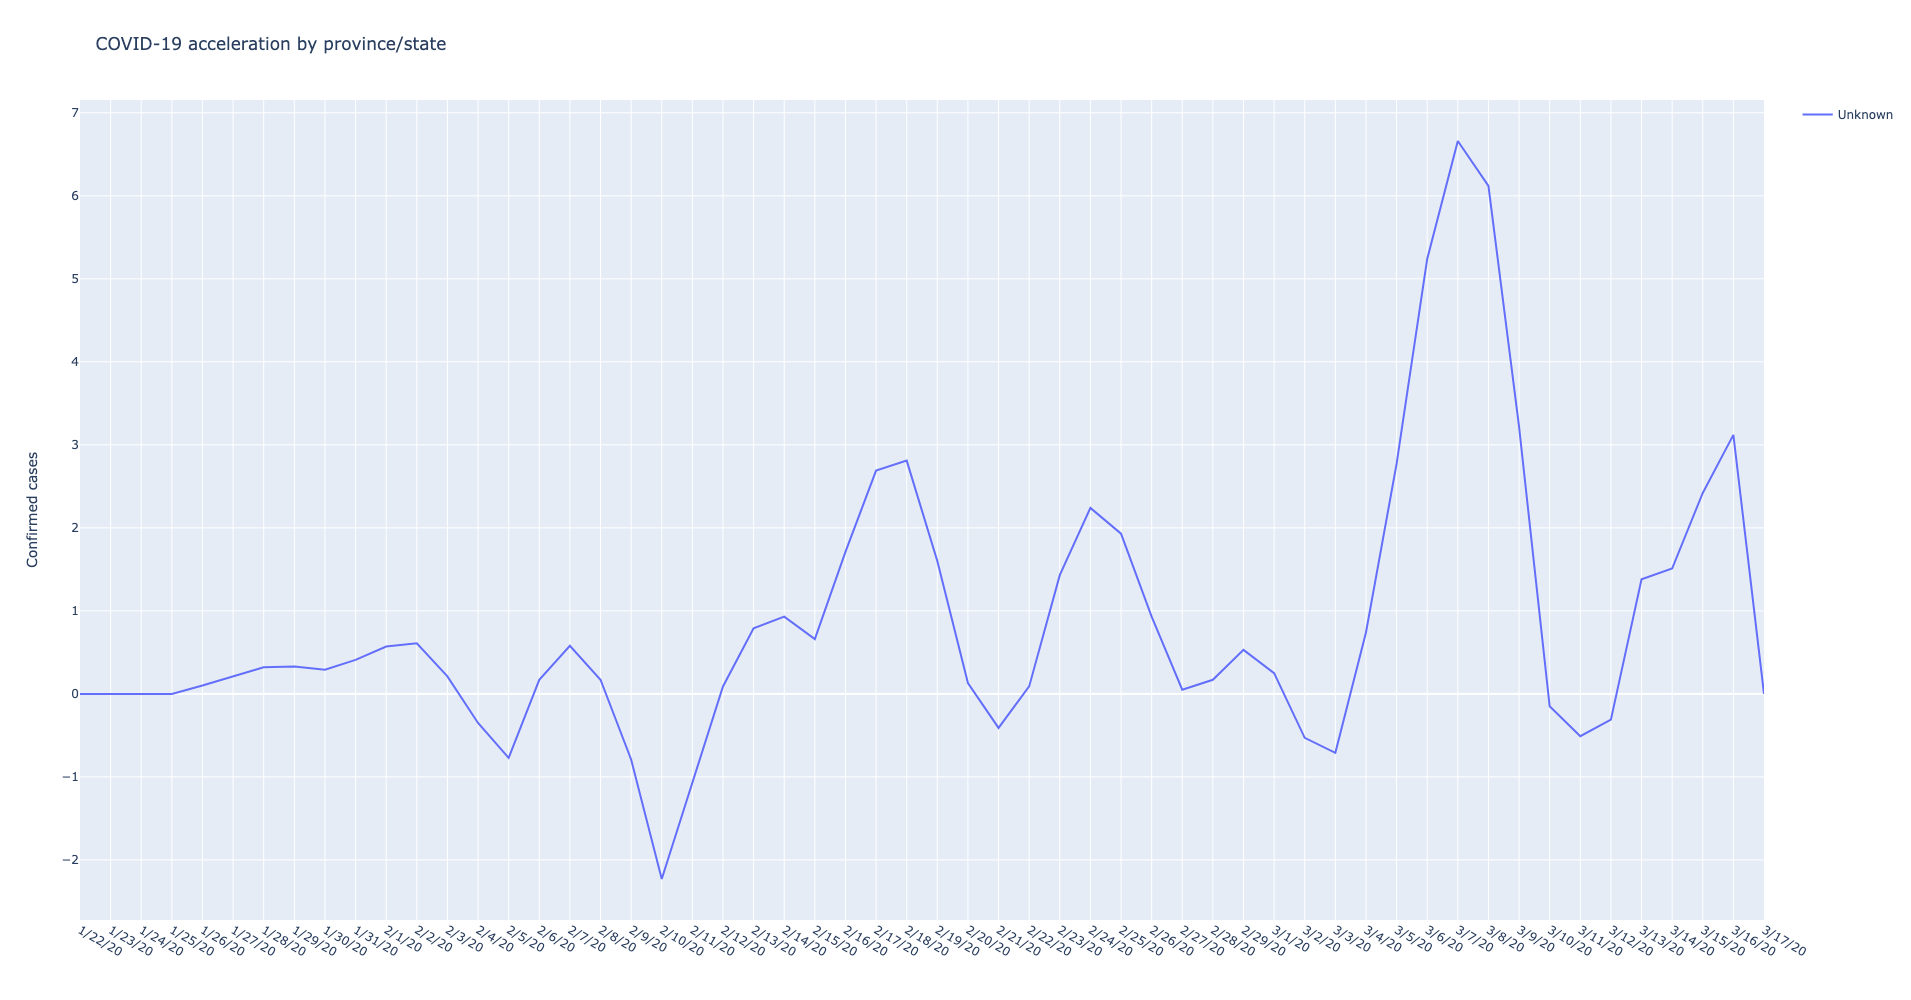

In [15]:
layout = go.Layout(title="COVID-19 acceleration by province/state",
                   yaxis={'title': 'Confirmed cases'},
                   height=1000)

fig = go.Figure(data=trace_accel, layout=layout)
fig.show()